In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
!pip install cython
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
!git clone https://github.com/ultralytics/yolov3.git

In [2]:
import pandas
print(pandas.__file__)
print(pandas.__version__)

/Users/parkmiryeong/anaconda3/envs/midoi/lib/python3.11/site-packages/pandas/__init__.py
2.1.0


In [3]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
torch.save(model, './tmp.pth')
loaded_model = torch.load('./tmp.pth')
print(loaded_model)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/parkmiryeong/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-9-15 Python-3.11.4 torch-2.0.1 CPU



[Errno 2] No such file or directory: '/Users/parkmiryeong/anaconda3/envs/midoi/lib/python3.11/site-packages/numpy-1.24.3.dist-info/METADATA'


100%|██████████| 14.1M/14.1M [00:02<00:00, 5.06MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [25]:
loaded_model = torch.load('./tmp.pth')
result_frame = loaded_model('fire.jpg')
print(result_frame)

image 1/1: 450x600 1 person, 1 truck
Speed: 5.8ms pre-process, 102.9ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)


In [38]:
!git clone https://github.com/ultralytics/yolov5.git

'yolov5'에 복제합니다...
remote: Enumerating objects: 15967, done.
remote: Total 15967 (delta 0), reused 0 (delta 0), pack-reused 15967
오브젝트를 받는 중: 100% (15967/15967), 14.56 MiB | 6.68 MiB/s, 완료.
델타를 알아내는 중: 100% (10966/10966), 완료.


우리가 만든 모델 가중치로 테스트해보기 --> 근데 왜 안됨?

In [51]:
!python yolov5/detect.py --weights "best.pt" --source "fire.jpg"

detect: weights=['best.pt'], source=fire.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
[Errno 2] No such file or directory: '/Users/parkmiryeong/anaconda3/envs/midoi/lib/python3.11/site-packages/numpy-1.24.3.dist-info/METADATA'
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.11.4 torch-2.0.1 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients
image 1/1 /Users/parkmiryeong/Desktop/PA23studyA/fire.jpg: 480x640 2 fires, 105.2ms
Speed: 0.5ms pre-process, 105.2ms inference, 0.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp3


In [55]:
# 우리가 만든 모델
fire_image = cv2.imread('fire.jpg')

loaded_model_night = torch.hub.load('./yolov5', 'custom', 'best.pt', source='local')

result = loaded_model_night(fire_image)
print(result)

YOLOv5 🚀 2023-9-15 Python-3.11.4 torch-2.0.1 CPU



Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 450x600 (no detections)
Speed: 2.0ms pre-process, 134.7ms inference, 0.2ms NMS per image at shape (1, 3, 480, 640)


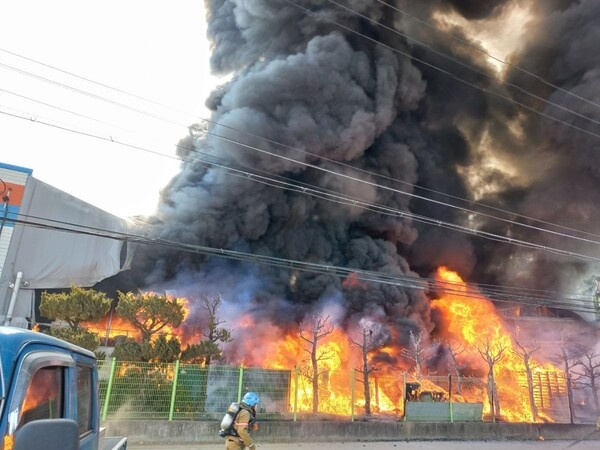

In [49]:
import IPython

for idx, box in result.pandas().xyxy[0].iterrows(): 
    xB = int(box[2])
    xA = int(box[0])
    yB = int(box[3])
    yA = int(box[1])
    cv2.rectangle(fire_image, (xA, yA), (xB, yB), (0, 255, 0), 2)
#                 print('box5', box.iloc[6])
    cv2.putText(fire_image, str(box[6]) , (xA, yA), cv2.FONT_HERSHEY_SIMPLEX, 0.6,(255, 0, 0), 1, cv2.LINE_AA)
        

# OpenCV에서 읽은 이미지를 IPython.display.Image로 변환하여 출력
image = IPython.display.Image(data=cv2.imencode('.jpg', fire_image)[1].tostring())
print('image', image)
IPython.display.clear_output(wait=True)
display(image)

In [ ]:
import cv2
from IPython.display import display, Image
import IPython
import urllib.request


url = "http://141.223.140.16:5001/video"
#cap = cv2.VideoCapture(url)
cap = cv2.VideoCapture()

if not cap.open(url):
    print("비디오 스트림을 열지 못했습니다.")
    exit()

if not cap.isOpened():
    raise RuntimeError("웹캠을 열 수 없습니다.")
    

try:
    while True:
        ret, frame = cap.read()
        
        if not ret:
            break

        loaded_model = torch.load('./tmp.pth')
        result_frame = loaded_model(frame)
        #print('result:',result_frame)
#         print(result_frame)
#         print(result_frame.pandas().xyxy[0])
        for idx, box in result_frame.pandas().xyxy[0].iterrows(): 
            xB = int(box[2])
            xA = int(box[0])
            yB = int(box[3])
            yA = int(box[1])
            cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 255, 0), 2)
#                 print('box5', box.iloc[6])
            cv2.putText(frame, str(box[6]) , (xA, yA), cv2.FONT_HERSHEY_SIMPLEX, 0.6,(255, 0, 0), 1, cv2.LINE_AA)
                
        
        # OpenCV에서 읽은 이미지를 IPython.display.Image로 변환하여 출력
        image = Image(data=cv2.imencode('.jpg', frame)[1].tostring())
        IPython.display.clear_output(wait=True)
        display(image)
        
        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()
    IPython.display.clear_output(wait=True)

In [ ]:
n=0
for i in result_frame.pandas().xyxy[0]:
    print(i)
    print(n)
    n+=1

In [ ]:
result_frame.pandas().xyxy[0]

In [ ]:
str(result_frame.xyxy[0][2][5].item())

In [ ]:
result_frame.pandas().xyxy[0]

In [ ]:
print(result_frame.pandas().xyxy[0])

In [ ]:
print(result_frame.pandas().xyxy[0].iloc[0][6])

In [ ]:
import cv2
from IPython.display import display, Image
import IPython
import urllib.request

def object_detection(frame):
   # 이미지의 차원을 모델 입력 차원으로 변환
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.image.resize(input_img, [300, 300])
    input_tensor = tf.cast(input_tensor, dtype=tf.uint8)
    input_tensor = input_tensor[tf.newaxis, ...]

   # 오브젝트 디텍션 실행
    detector_output = detector(input_tensor)

   # 결과를 이미지에 표시
    for i in range(int(detector_output["num_detections"])):
        score = float(detector_output["detection_scores"][0, i])
        if score > 0.5: # 미리 설정한 신뢰 임계값 (이 값은 조정 가능)
           # bounding box 좌표를 찾아서 이미지에 표시
            bbox = detector_output["detection_boxes"][0, i].numpy()
            (ymin, xmin, ymax, xmax) = (bbox[0] * frame.shape[0], bbox[1] * frame.shape[1], bbox[2] * frame.shape[0], bbox[3] * frame.shape[1])
            cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
   
    return frame


url = "http://141.223.140.16:5001/video"
#cap = cv2.VideoCapture(url)
cap = cv2.VideoCapture()

if not cap.open(url):
    print("비디오 스트림을 열지 못했습니다.")
    exit()

if not cap.isOpened():
    raise RuntimeError("웹캠을 열 수 없습니다.")
    

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
            
            

        # 오브젝트 디텍션 함수 호출
        frame = object_detection(frame)
        
        
        # OpenCV에서 읽은 이미지를 IPython.display.Image로 변환하여 출력
        image = Image(data=cv2.imencode('.jpg', frame)[1].tostring())
        IPython.display.clear_output(wait=True)
        display(image)
        
        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()
    IPython.display.clear_output(wait=True)

In [ ]:
import cv2
from IPython.display import display, Image
import IPython
import subprocess

def object_detection(frame):
   # 이미지의 차원을 모델 입력 차원으로 변환
    input_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.image.resize(input_img, [300, 300])
    input_tensor = tf.cast(input_tensor, dtype=tf.uint8)
    input_tensor = input_tensor[tf.newaxis, ...]

   # 오브젝트 디텍션 실행
    detector_output = detector(input_tensor)

   # 결과를 이미지에 표시
    for i in range(int(detector_output["num_detections"])):
        score = float(detector_output["detection_scores"][0, i])
        if score > 0.5: # 미리 설정한 신뢰 임계값 (이 값은 조정 가능)
           # bounding box 좌표를 찾아서 이미지에 표시
            bbox = detector_output["detection_boxes"][0, i].numpy()
            (ymin, xmin, ymax, xmax) = (bbox[0] * frame.shape[0], bbox[1] * frame.shape[1], bbox[2] * frame.shape[0], bbox[3] * frame.shape[1])
            cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
   
    return frame








url = "http://141.223.140.16:5001/video"
#cap = cv2.VideoCapture(url)
cap = cv2.VideoCapture()

if not cap.open(url):
    print("비디오 스트림을 열지 못했습니다.")
    exit()
    

if not cap.isOpened():
    raise RuntimeError("웹캠을 열 수 없습니다.")

    
YOLO_net = cv2.dnn.readNet("yolov2-tiny.weights","yolov2-tiny.cfg")
# YOLO NETWORK 재구성
classes = []
with open("yolo.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = YOLO_net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in YOLO_net.getUnconnectedOutLayers()]
    
    

try:
    while True:
        ret, frame = cap.read()
        h, w, c = frame.shape
        
        if not ret:
            break
            
        # YOLO 입력
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        YOLO_net.setInput(blob)
        outs = YOLO_net.forward(output_layers)

        class_ids = []
        confidences = []
        boxes = []
        
        
        for out in outs:

            for detection in out:

                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                # 검출 신뢰도
                if confidence > 0.5:
                    # Object detected
                   # 검출기의 경계상자 좌표는 0 ~ 1로 정규화되어있으므로 다시 전처리  
                    center_x = int(detection[0] * w)
                    center_y = int(detection[1] * h)
                    dw = int(detection[2] * w)
                    dh = int(detection[3] * h)
                    # Rectangle coordinate
                    x = int(center_x - dw / 2)
                    y = int(center_y - dh / 2)
                    boxes.append([x, y, dw, dh])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.45, 0.4)
        
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                score = confidences[i]

                # 경계상자와 클래스 정보 투영
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 5)
                cv2.putText(frame, label, (x, y - 20), cv2.FONT_ITALIC, 0.5, (255, 255, 255), 1)

#         # 오브젝트 디텍션 함수 호출
#         frame = object_detection(frame)
        
        
        # OpenCV에서 읽은 이미지를 IPython.display.Image로 변환하여 출력
        image = Image(data=cv2.imencode('.jpg', frame)[1].tostring())
        IPython.display.clear_output(wait=True)
        display(image)
        
        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()
    IPython.display.clear_output(wait=True)